In [ ]:
print("Hello")


Hello


In [ ]:
!pip install pandas matplotlib sqlalchemy


In [ ]:
import pandas as pd
import numpy as np

# Simulate IT audit log data
data = {
    'System': ['System_A', 'System_B', 'System_C', 'System_D', 'System_E'],
    'Control_Implemented': [True, False, True, False, True],
    'Last_Audit_Date': ['2023-12-01', '2023-11-15', '2023-12-05', '2023-10-20', '2023-11-10'],
    'Control_Gap': [0, 1, 0, 1, 0],
    'Risk_Score': [8, 3, 6, 4, 7]  # Lower score indicates higher risk
}

df = pd.DataFrame(data)

# Convert date columns to datetime type
df['Last_Audit_Date'] = pd.to_datetime(df['Last_Audit_Date'])

df.head()


,System,Control_Implemented,Last_Audit_Date,Control_Gap,Risk_Score
0,System_A,True,2023-12-01,0,8
1,System_B,False,2023-11-15,1,3
2,System_C,True,2023-12-05,0,6
3,System_D,False,2023-10-20,1,4
4,System_E,True,2023-11-10,0,7


In [ ]:
# Function to assess risk based on control gaps and risk score
def assess_risk(row):
    if row['Control_Gap'] == 1:
        return 'High Risk'
    elif row['Risk_Score'] >= 7:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

# Apply risk assessment
df['Risk_Level'] = df.apply(assess_risk, axis=1)

df[['System', 'Control_Implemented', 'Risk_Level', 'Last_Audit_Date']]


,System,Control_Implemented,Risk_Level,Last_Audit_Date
0,System_A,True,Moderate Risk,2023-12-01
1,System_B,False,High Risk,2023-11-15
2,System_C,True,Low Risk,2023-12-05
3,System_D,False,High Risk,2023-10-20
4,System_E,True,Moderate Risk,2023-11-10


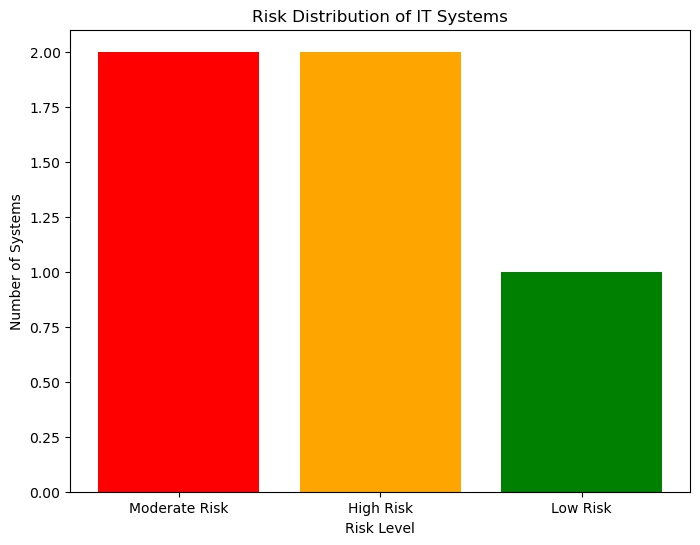

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Risk Levels
plt.figure(figsize=(8,6))
risk_count = df['Risk_Level'].value_counts()
plt.bar(risk_count.index, risk_count.values, color=['red', 'orange', 'green'])
plt.xlabel('Risk Level')
plt.ylabel('Number of Systems')
plt.title('Risk Distribution of IT Systems')
plt.show()


In [ ]:
# Filter high-risk systems
high_risk_systems = df[df['Risk_Level'] == 'High Risk']

# Report generation
report = f"High-Risk Systems Report\n{'-'*30}\n"
for index, row in high_risk_systems.iterrows():
    report += f"System: {row['System']}\n"
    report += f"Last Audit: {row['Last_Audit_Date'].strftime('%Y-%m-%d')}\n"
    report += f"Recommendation: Improve controls immediately\n\n"

# Display report
print(report)


High-Risk Systems Report
------------------------------
System: System_B
Last Audit: 2023-11-15
Recommendation: Improve controls immediately

System: System_D
Last Audit: 2023-10-20
Recommendation: Improve controls immediately




In [ ]:
df.to_csv('audit_risk_report.csv', index=False)
